In [10]:
# Load the dataset
import pandas as pd
import warnings

# import all other modules for plotting
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_excel('data/AIDS_BD_2000_2024.xlsx')

df.set_index('Year')

,AIDS infected,AIDS death,PoP,Upop,Rpop,GDP per capita (USD),GNI per capita (USD),Human Development Index (HDI),Proverty rate (%)
Year,,,,,,,,,
2000,31,1,129200000,26226927,102973073,620,430,0.485,48.90
2001,31,3,136578600,32505706,104072893,641,430,0.492,35.00
2002,60,16,138612896,33960159,104652737,655,430,0.499,49.80
2003,115,10,140647193,35443092,105204100,677,460,0.505,14.40
2004,102,14,142681489,36954505,105726983,702,500,0.511,48.90
2005,193,30,144715786,38494399,106221386,739,540,0.518,40.00
2006,216,35,146213025,40033126,106179898,779,570,0.524,41.50
2007,333,14,147710264,41595210,106115053,825,600,0.527,35.00
2008,288,42,149207503,43180651,106026851,866,660,0.530,35.00


In [11]:
# Summary of the dataset
df.drop(columns=['Year']).describe().apply(lambda x: x.apply(lambda y: f'{int(y)}' if x.name in ['PoP', 'Upop', 'Rpop'] else f'{y:.2f}'))

,AIDS infected,AIDS death,PoP,Upop,Rpop,GDP per capita (USD),GNI per capita (USD),Human Development Index (HDI),Proverty rate (%)
count,25.00,25.00,25,25,25,25.00,25.00,25.00,25.00
mean,491.84,91.24,154483278,50378168,104105109,1193.56,1278.56,0.58,27.19
std,383.80,77.88,11844164,12991832,1833572,545.97,857.31,0.06,12.08
min,31.00,1.00,129200000,26226927,100614628,620.00,430.00,0.48,6.10
25%,216.00,30.00,146213025,40033126,102973073,779.00,570.00,0.52,18.70
50%,370.00,82.00,155074460,49902961,104652737,1050.00,970.00,0.57,24.30
75%,729.00,141.00,163532086,60964761,105726983,1462.00,2020.00,0.64,35.00
max,1438.00,266.00,174701211,70815866,106221386,2624.00,2860.00,0.67,49.80


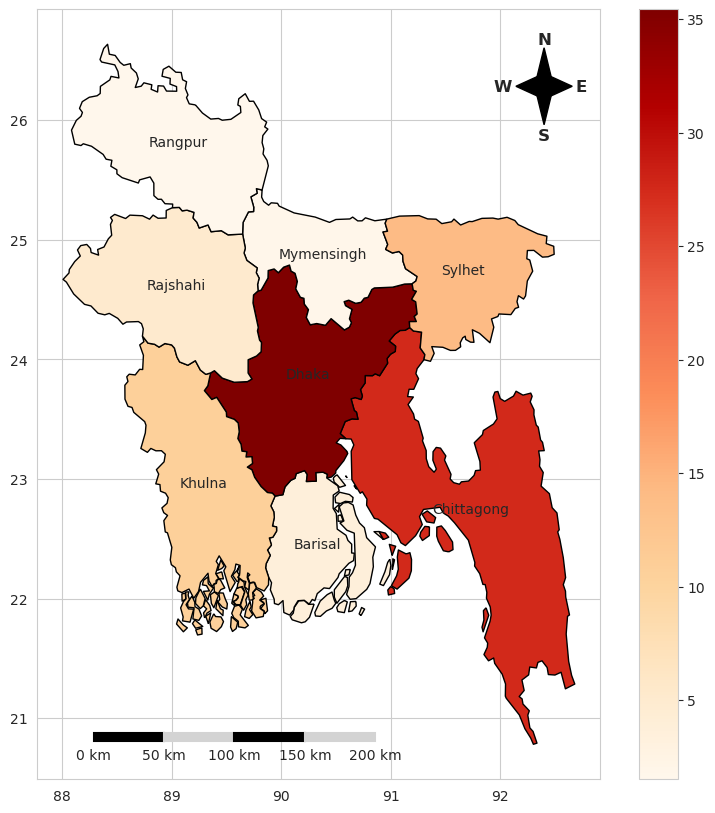

In [12]:
# Load the GeoJSON file for districts
geojson_path = './geodata/small_bangladesh_geojson_adm1_8_divisions_bibhags.json'
divisions = gpd.read_file(geojson_path)

division_data = {
    "Dhaka": 35.44,
    "Chittagong": 27.51,
    "Khulna": 10.70,
    "Barisal": 3.65,
    "Rajshahi": 5.12,
    "Sylhet": 14.20,
    "Rangpur": 1.51,
    "Mymensingh": 1.85,
}

divisions['Infected'] = divisions["ADM1_EN"].map(division_data).fillna(0)

fig, ax = plt.subplots(figsize=(10, 10))
ax = divisions.plot(
    ax=ax, edgecolor="black", column="Infected", markersize=10, legend=True, cmap="OrRd"
)

divisions.apply(
    lambda x: ax.annotate(
        text=x.ADM1_EN, xy=x.geometry.centroid.coords[0], ha="center"
    ),
    axis=1,
)

# Add intersecting arrows for North, South, East, and West
arrow_length = 0.05  # Length of each arrow in axes coordinates
arrow_base_x, arrow_base_y = 0.9, 0.9  # Base of the arrows in axes coordinates

# North Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, 0, arrow_length, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x, arrow_base_y + arrow_length + 0.005, 'N', ha='center', fontsize=12, transform=ax.transAxes, weight='bold')

# South Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, 0, -arrow_length, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x, arrow_base_y - arrow_length - 0.02, 'S', ha='center', fontsize=12, transform=ax.transAxes, weight='bold')

# East Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, arrow_length, 0, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x + arrow_length + 0.005, arrow_base_y, 'E', va='center', fontsize=12, transform=ax.transAxes, weight='bold')

# West Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, -arrow_length, 0, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x - arrow_length - 0.04, arrow_base_y, 'W', va='center', fontsize=12, transform=ax.transAxes, weight='bold')

# Add Scale Bar right below the map, in km. Length of 0-200 km in 50 km intervals in black and white colors boxes.
scale_bar_x = 0.1  # Starting x position (axes coordinates)
scale_bar_y = 0.05  # Starting y position (axes coordinates)
scale_bar_length = 0.5  # Total length of the scale bar (axes fraction)
scale_bar_height = 0.01  # Height of the scale bar (axes fraction)
segment_length = scale_bar_length / 4  # Length of each segment (4 segments for 0-200 km)
scale_bar_colors = ['black', 'white']  # Alternating colors for the segments

# Create the scale bar with alternating colors
for i in range(4):  # 4 segments (0-50, 50-100, 100-150, 150-200)
    ax.add_patch(plt.Rectangle(
        (scale_bar_x + i * segment_length, scale_bar_y),  # Bottom-left corner of the segment
        segment_length, scale_bar_height,  # Width and height of the segment
        color='black' if i % 2 == 0 else 'lightgray',  # Alternate between black and gray
        transform=ax.transAxes,  # Use axes-relative coordinates
        edgecolor='black',  # Add a border to each segment
        linewidth=1.5
    ))

# Add labels below the scale bar
for i, label in enumerate(range(0, 201, 50)):  # Labels: 0, 50, 100, 150, 200
    ax.text(
        scale_bar_x + i * segment_length, scale_bar_y - 0.01,  # Position below each segment
        f'{label} km', ha='center', va='top', fontsize=10, transform=ax.transAxes
    )

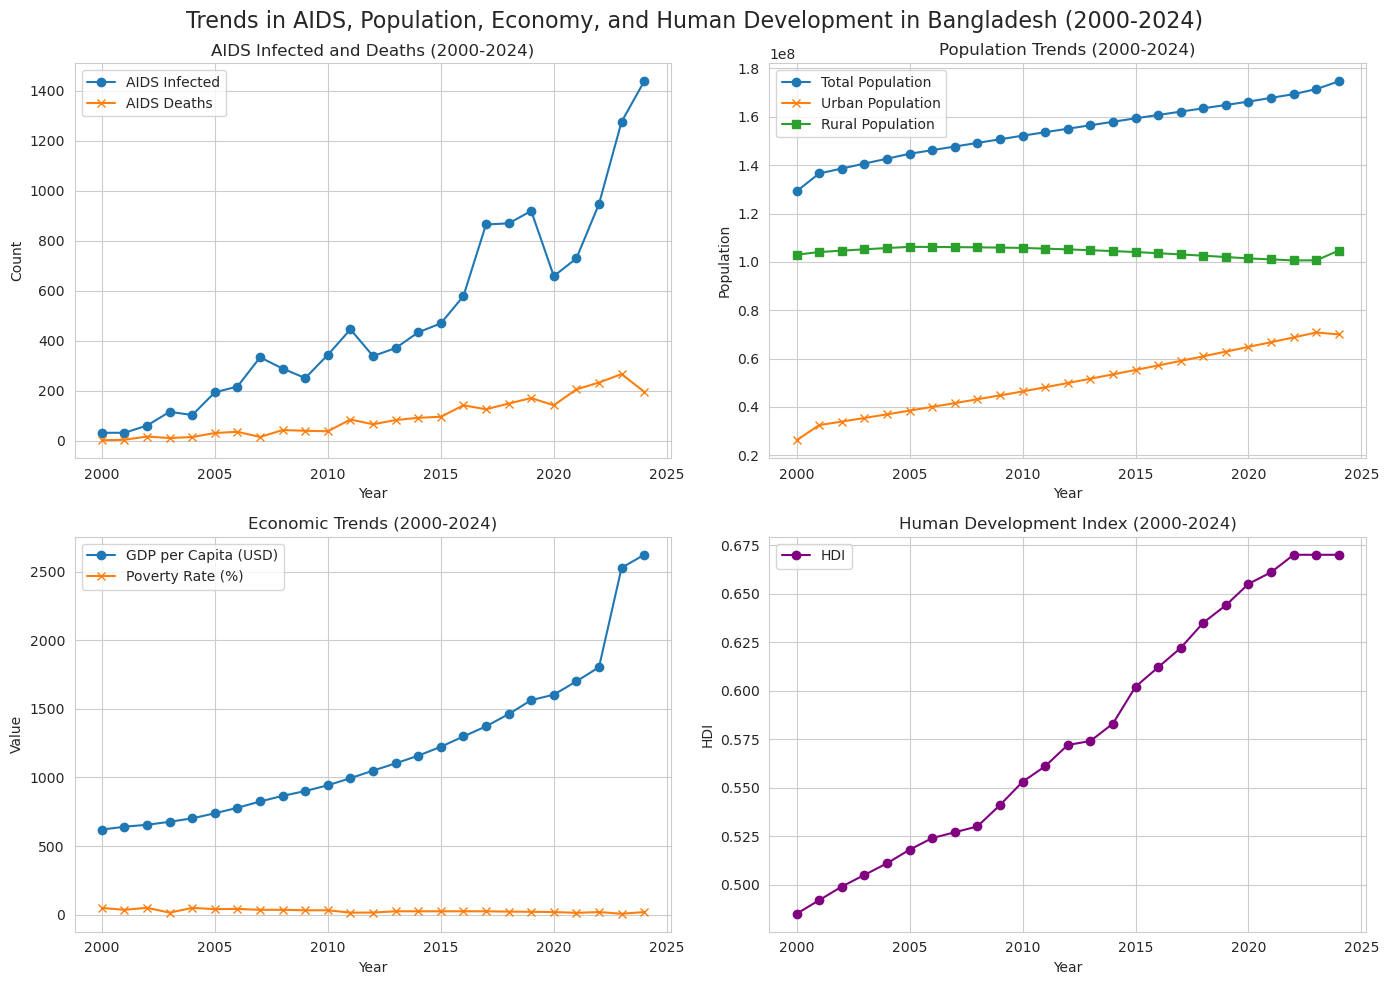

In [13]:
sns.set_style("whitegrid")
sns.color_palette("viridis", as_cmap=True)

years = df['Year']
aids_infected = df['AIDS infected']
aids_death = df['AIDS death']
total_population = df['PoP']
urban_population = df['Upop']
rural_population = df['Rpop']
gdp_per_capita = df['GDP per capita (USD)']
poverty_rate = df['Proverty rate (%)']

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: AIDS Infected and Deaths
axs[0, 0].plot(years, aids_infected, label="AIDS Infected", marker='o')
axs[0, 0].plot(years, aids_death, label="AIDS Deaths", marker='x')
# axs[0, 0].plot(years, aids_death/aids_infected, label="CFR", marker='s')
axs[0, 0].set_title("AIDS Infected and Deaths (2000-2024)")
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("Count")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Population Trends
axs[0, 1].plot(years, total_population, label="Total Population", marker='o')
axs[0, 1].plot(years, urban_population, label="Urban Population", marker='x')
axs[0, 1].plot(years, rural_population, label="Rural Population", marker='s')
axs[0, 1].set_title("Population Trends (2000-2024)")
axs[0, 1].set_xlabel("Year")
axs[0, 1].set_ylabel("Population")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3: GDP Per Capita and Poverty Rate
axs[1, 0].plot(years, gdp_per_capita, label="GDP per Capita (USD)", marker='o')
axs[1, 0].plot(years, poverty_rate, label="Poverty Rate (%)", marker='x')
axs[1, 0].set_title("Economic Trends (2000-2024)")
axs[1, 0].set_xlabel("Year")
axs[1, 0].set_ylabel("Value")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot 4: HDI Trend
hdi = df['Human Development Index (HDI)']
axs[1, 1].plot(years, hdi, label="HDI", marker='o', color='purple')
axs[1, 1].set_title("Human Development Index (2000-2024)")
axs[1, 1].set_xlabel("Year")
axs[1, 1].set_ylabel("HDI")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.suptitle("Trends in AIDS, Population, Economy, and Human Development in Bangladesh (2000-2024)", fontsize=16)
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

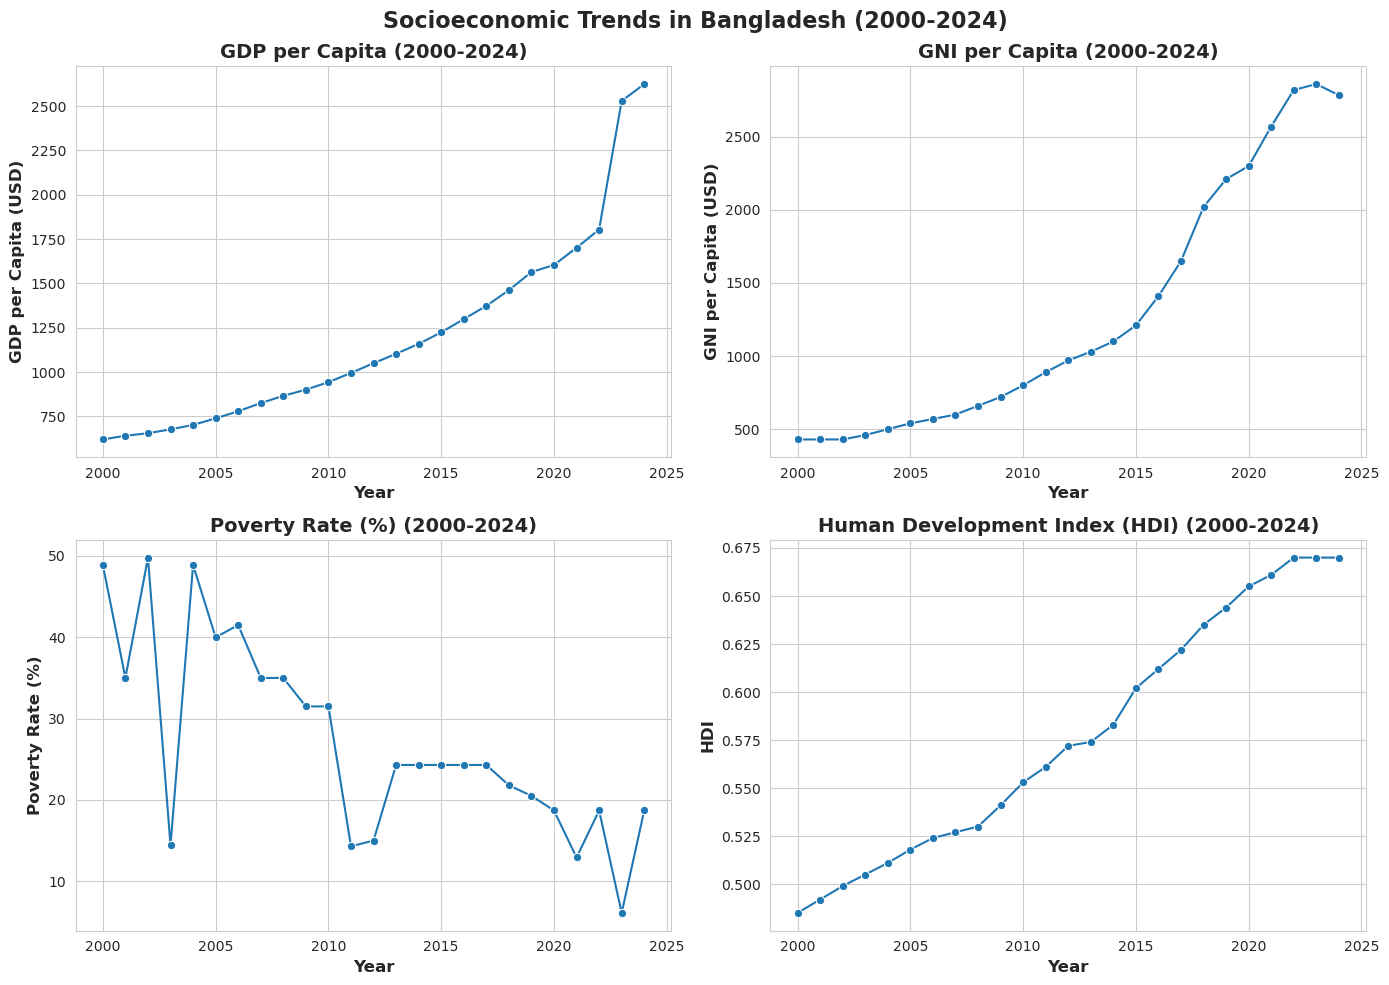

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: GDP per Capita vs. Year
sns.lineplot(x='Year', y='GDP per capita (USD)', data=df, ax=axs[0, 0], marker='o')
axs[0, 0].set_title("GDP per Capita (2000-2024)", fontsize=14, weight="bold")
axs[0, 0].set_xlabel("Year", fontsize=12, weight="bold")
axs[0, 0].set_ylabel("GDP per Capita (USD)", fontsize=12, weight="bold")
axs[0, 0].grid(True)

# Plot 2: GNI per Capita vs. Year
sns.lineplot(x='Year', y='GNI per capita (USD)', data=df, ax=axs[0, 1], marker='o')
axs[0, 1].set_title("GNI per Capita (2000-2024)", fontsize=14, weight="bold")
axs[0, 1].set_xlabel("Year", fontsize=12, weight="bold")
axs[0, 1].set_ylabel("GNI per Capita (USD)", fontsize=12, weight="bold")
axs[0, 1].grid(True)

# Plot 3: Poverty Rate vs. Year
sns.lineplot(x='Year', y='Proverty rate (%)', data=df, ax=axs[1, 0], marker='o')
axs[1, 0].set_title("Poverty Rate (%) (2000-2024)", fontsize=14, weight="bold")
axs[1, 0].set_xlabel("Year", fontsize=12, weight="bold")
axs[1, 0].set_ylabel("Poverty Rate (%)", fontsize=12, weight="bold")
axs[1, 0].grid(True)

# Plot 4: Human Development Index vs. Year
sns.lineplot(x='Year', y='Human Development Index (HDI)', data=df, ax=axs[1, 1], marker='o')
axs[1, 1].set_title("Human Development Index (HDI) (2000-2024)", fontsize=14, weight="bold")
axs[1, 1].set_xlabel("Year", fontsize=12, weight="bold")
axs[1, 1].set_ylabel("HDI", fontsize=12, weight="bold")
axs[1, 1].grid(True)

plt.suptitle("Socioeconomic Trends in Bangladesh (2000-2024)", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

Text(95.7222222222222, 0.5, 'Variables')

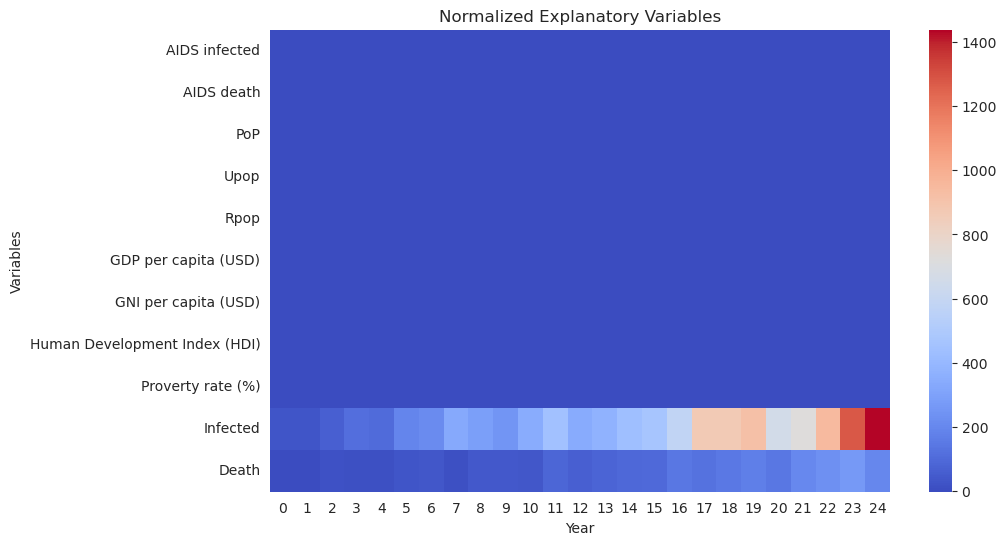

In [15]:
normalized_data = df[
    [
        "AIDS infected",
        "AIDS death",
        "PoP",
        "Upop",
        "Rpop",
        "GDP per capita (USD)",
        "GNI per capita (USD)",
        "Human Development Index (HDI)",
        "Proverty rate (%)",
    ]
]

normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Add the Infected column to normalized data for better comparison
normalized_data["Infected"] = df["AIDS infected"]

# Add the Death column to normalized data for better comparison
normalized_data["Death"] = df["AIDS death"]

# Display the normalized data
normalized_data.head().reset_index(drop=True)

# Plot the normalized explanatory variables without annotation numbers
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")

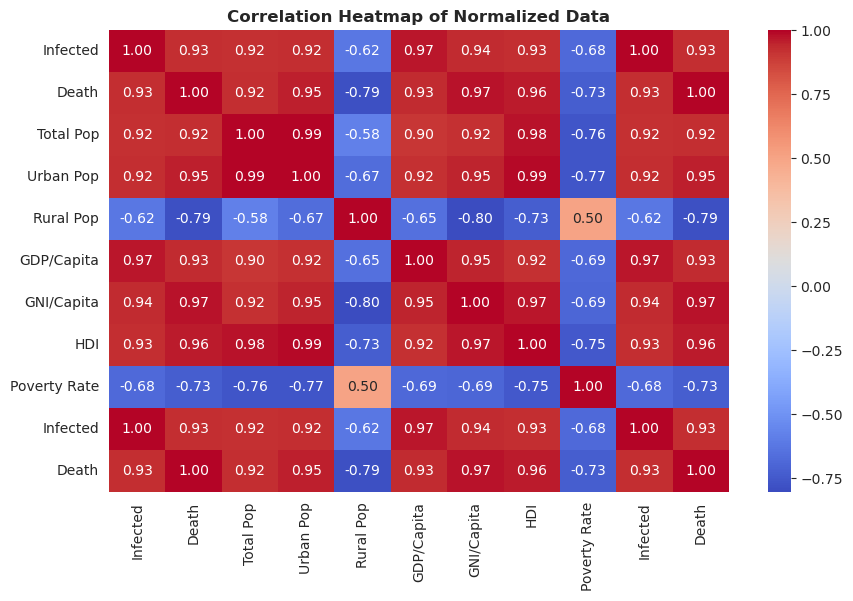

In [16]:
# Rename columns for shorter labels
short_labels = {
    "AIDS infected": "Infected",
    "AIDS death": "Death",
    "PoP": "Total Pop",
    "Upop": "Urban Pop",
    "Rpop": "Rural Pop",
    "GDP per capita (USD)": "GDP/Capita",
    "GNI per capita (USD)": "GNI/Capita",
    "Human Development Index (HDI)": "HDI",
    "Proverty rate (%)": "Poverty Rate",
}
normalized_data_short = normalized_data.rename(columns=short_labels)

# Plot a correlation heatmap of the normalized data to identify the relationships between variables
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data_short.corr(), cmap="coolwarm", annot=True, cbar=True, fmt=".2f")
plt.title("Correlation Heatmap of Normalized Data", weight="bold")
plt.show()

<Figure size 2000x2000 with 0 Axes>

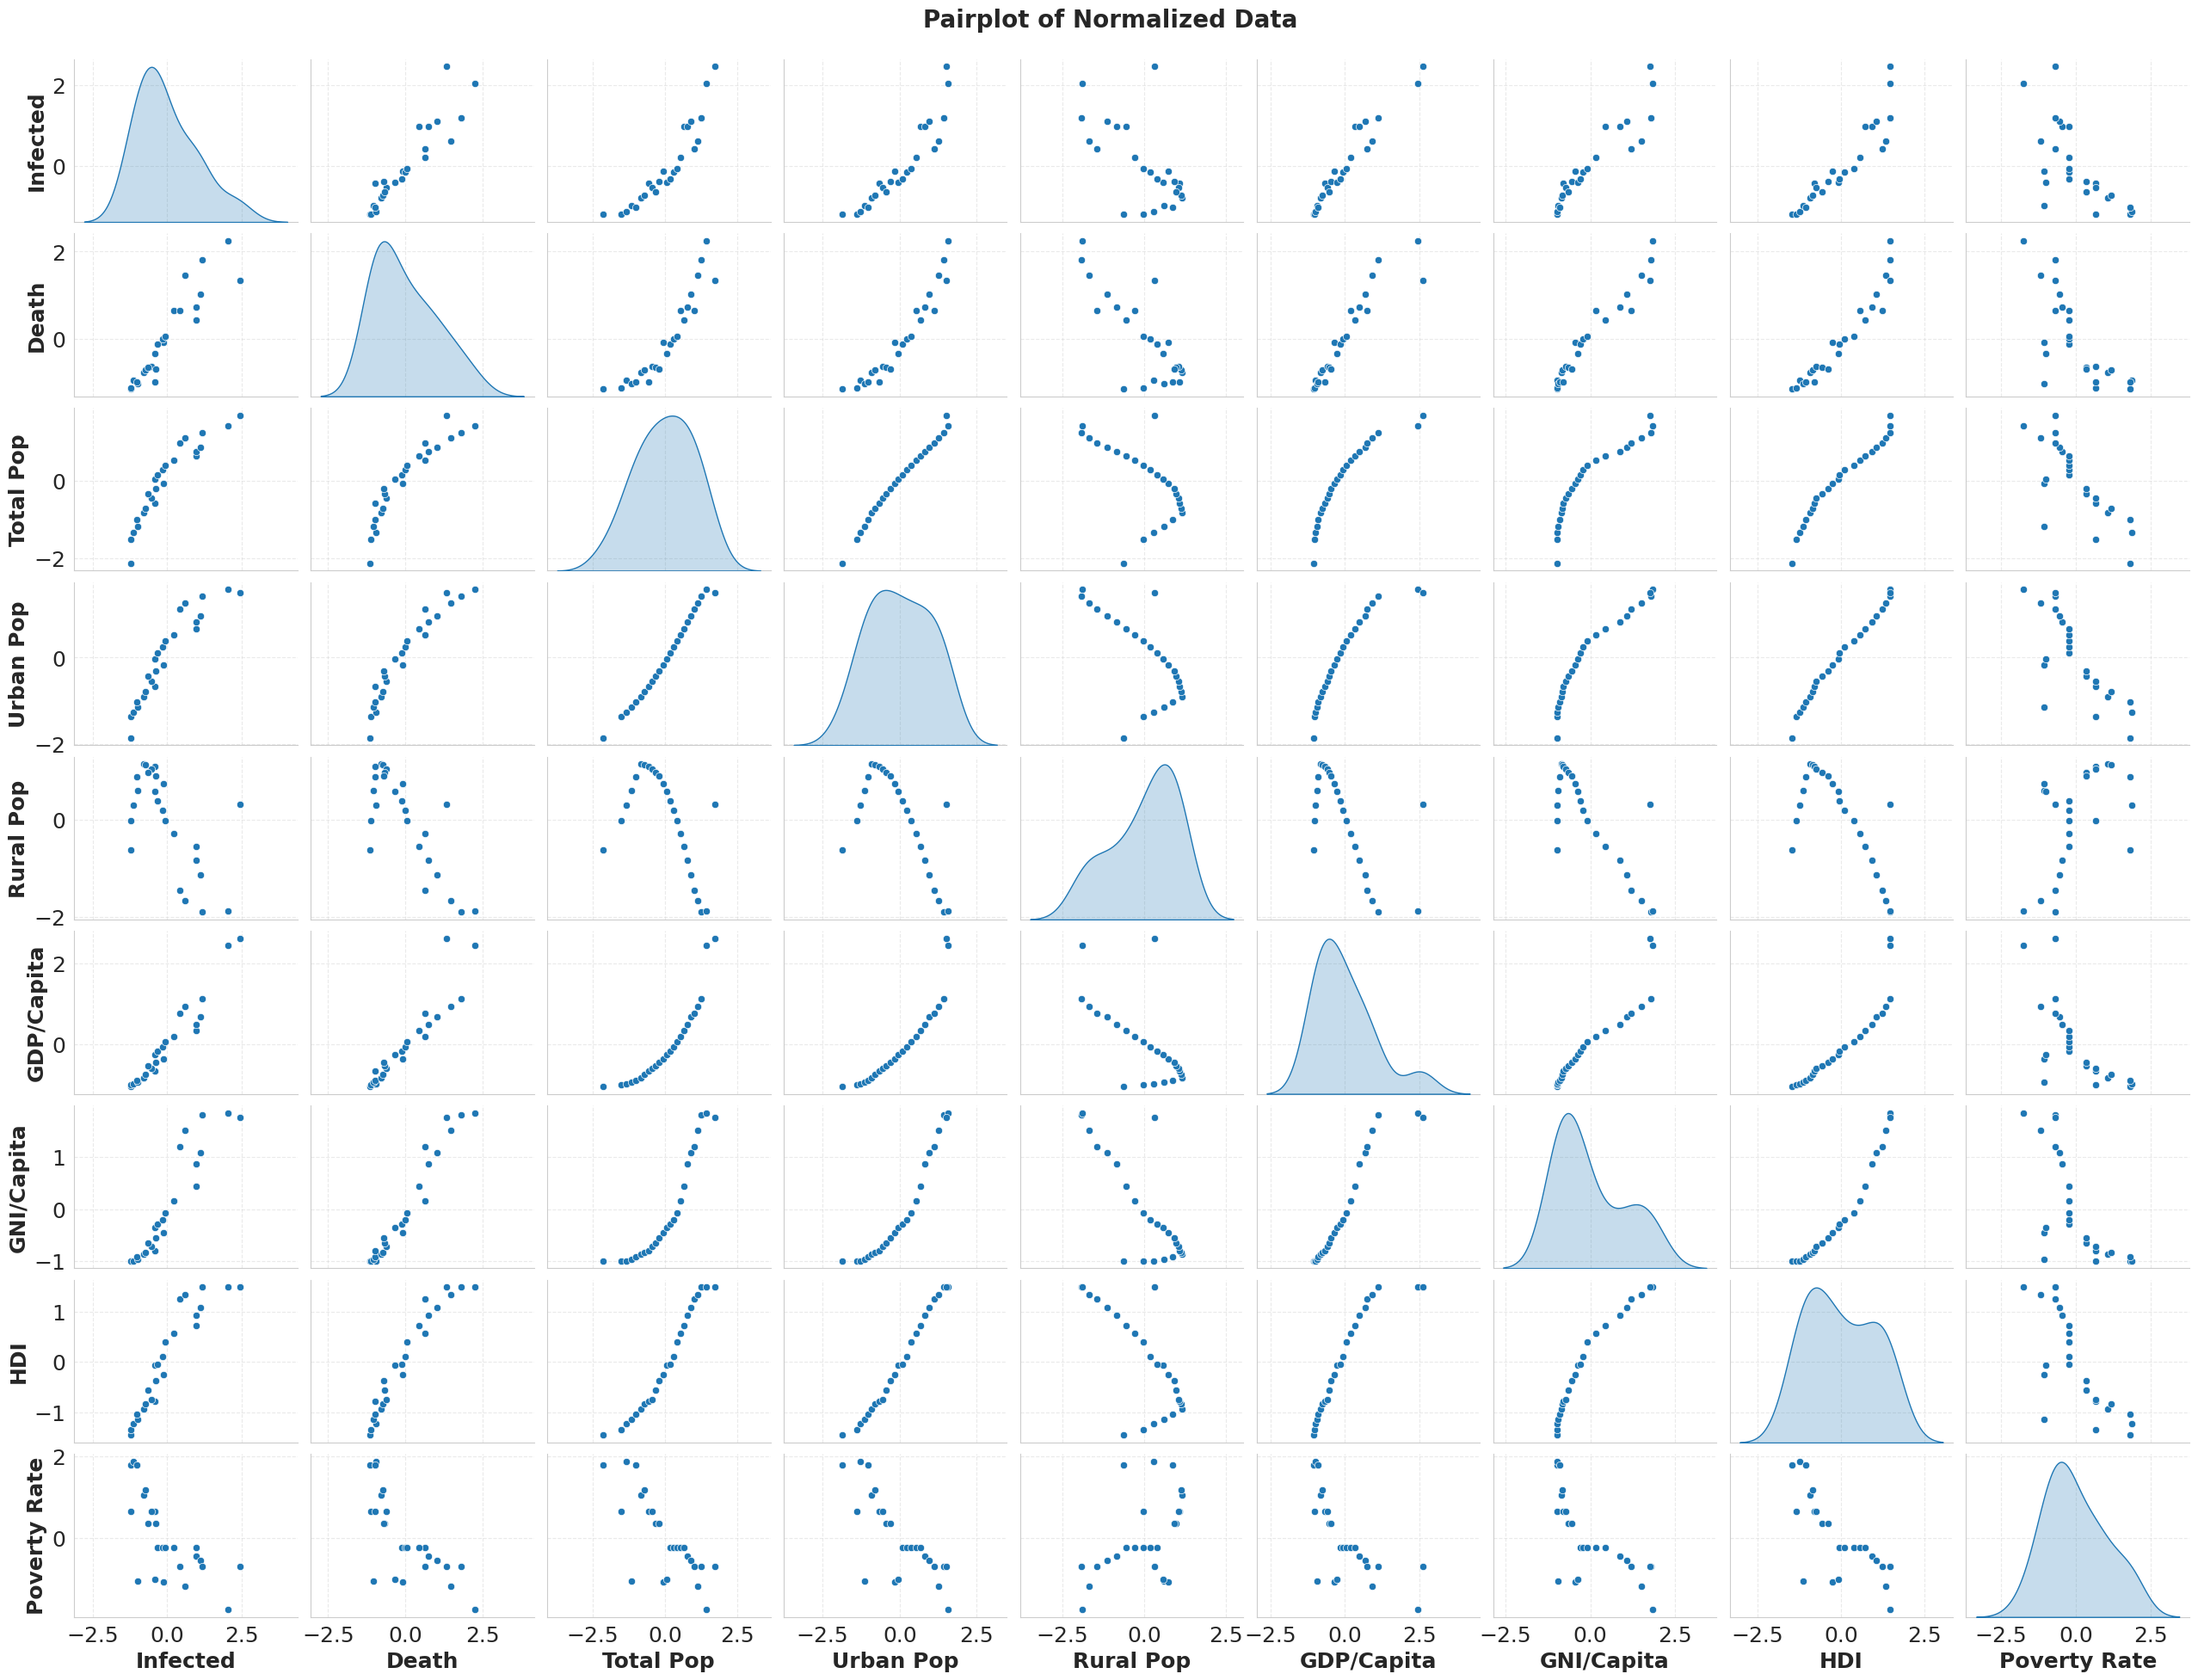

In [17]:
# Improved Pairplot with Larger and Bold Axis Labels

# Create a pairplot of the normalized data with custom settings
plt.figure(figsize=(20, 20))
pairplot = sns.pairplot(
    normalized_data_short.iloc[:, :-2],
    diag_kind="kde",
    height=2.2,
    aspect=1.3,
    # palette="coolwarm",
)

# Customize diagonal KDE plots for better smoothing
for ax in pairplot.diag_axes:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel("Density", fontsize=18, weight="bold")

# Add gridlines and adjust subplot titles
for ax in pairplot.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_xlabel(ax.get_xlabel(), fontsize=18, weight="bold")
    ax.set_ylabel(ax.get_ylabel(), fontsize=18, weight="bold")
    ax.tick_params(axis='both', which='major', labelsize=18)

# Set title for the entire figure
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairplot of Normalized Data", fontsize=20, weight="bold")

# Show the plot
plt.show()
